In [1]:
import mysql_auth 
from MySQLConnection import *
import pandas as pd
import numpy as np

In [2]:
# conn = MySQLConnection(DB_info=mysql_auth.NYXL_DB_Match_FinalStat)
# input_df = conn.read_all_tables_as_df()
input_df = pd.read_csv('input_df.csv')
display(input_df)

C:\Users\jyc13\anaconda3\envs\owl-data\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (6,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,MatchId,num_map,Map,map_type,Section,RoundName,Timestamp,Team,Player,...,OffensiveAssists/s,RCP,FBValue,DeathRisk,TF_order,TF_winner,TF_duration,TF_RCP_sum,TF_RCP_weighted_sum,DominanceIndex
0,0,37147,1,Busan,CONTROL,1.0,Sanctuary,2021-05-02 23:20:23,Dallas Fuel,Doha,...,0.0,-1.75,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.195832
1,1,37147,1,Busan,CONTROL,1.0,Sanctuary,2021-05-02 23:20:23,Dallas Fuel,Fielder,...,0.0,-1.75,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.195832
2,2,37147,1,Busan,CONTROL,1.0,Sanctuary,2021-05-02 23:20:23,Dallas Fuel,Jecse,...,0.0,-1.75,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.195832
3,3,37147,1,Busan,CONTROL,1.0,Sanctuary,2021-05-02 23:20:23,Houston Outlaws,Crimzo,...,0.0,-1.75,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.195832
4,4,37147,1,Busan,CONTROL,1.0,Sanctuary,2021-05-02 23:20:23,Houston Outlaws,Happy,...,0.0,-1.75,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.195832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485317,2485317,37404,3,Eichenwalde,HYBRID,2.0,NaN,2021-06-06 19:59:43,Houston Outlaws,Dreamer,...,0.0,0.00,0.0,0.0,7.0,Dallas Fuel,66.927,34.833333,50.219882,-0.119838
2485318,2485318,37404,3,Eichenwalde,HYBRID,2.0,NaN,2021-06-06 19:59:43,Houston Outlaws,Happy,...,0.0,0.00,0.0,0.0,7.0,Dallas Fuel,66.927,34.833333,50.219882,-0.119838
2485319,2485319,37404,3,Eichenwalde,HYBRID,2.0,NaN,2021-06-06 19:59:43,Houston Outlaws,joobi,...,0.0,0.00,0.0,0.0,7.0,Dallas Fuel,66.927,34.833333,50.219882,-0.119838
2485320,2485320,37404,3,Eichenwalde,HYBRID,2.0,NaN,2021-06-06 19:59:43,Houston Outlaws,joobi,...,0.0,0.00,0.0,0.0,7.0,Dallas Fuel,66.927,34.833333,50.219882,-0.119838


In [3]:
selected_features = [
    'TimePlayed/s', 'HeroDamageDealt/s', 'BarrierDamageDealt/s', 'HeroDamageTaken/s', 'HealingDealt/s', 'HealingReceived/s', 'DefensiveAssists/s', 'OffensiveAssists/s', 'FBValue', 'DeathRisk', 'EnvironmentalDeaths/s', 'EnvironmentalKills/s', 'SoloKills/s', 'UltimatesUsed/s'
]

In [4]:
df_init = input_df[input_df['TF_order'].notna()]
df_init['IsTFWinner'] = df_init['Team'] == df_init['TF_winner']
df_init['HeroComp'] = df_init['Hero']
df_init = pd.get_dummies(data=df_init, columns=['HeroComp'], prefix='Hero')
df_X = df_init.groupby(['MatchId', 'num_map', 'Map', 'Section', 'TF_order', 'Team', 'Player', 'Hero'])[selected_features + [x for x in df_init.columns if x.startswith('Hero_')] + ['IsTFWinner']].sum()
df_X = df_X[df_X['TimePlayed/s'] != 0]
df_X.loc[df_X['IsTFWinner'] != 0, 'IsTFWinner'] = 1
hero_col = [x for x in df_X.columns if x.startswith('Hero_')]
for col in hero_col:
    df_X.loc[df_X[col] != 0, col] = 1

df_y = df_X['IsTFWinner']
df_X = df_X.drop('IsTFWinner', axis=1)

display(df_X)
display(df_y)

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TimePlayed/s  \
MatchId num_map Map         Section TF_order Team            Player   Hero                     
37147   1       Busan       1.0     1.0      Dallas Fuel     Doha     Sombra         26.2836   
                                                             Fearless Winston        26.2836   
                                                             Fielder  Moira          26.2836   
                                                             HanBin   D.Va           26.2836   
                                                             Jecse    Lucio          26.2836   
...                                                                                      ...   
37404   3       Eichenwalde 2.0     7.0      Houston Outlaws Danteh   Echo           69.1270   
                                                             Dreamer  Winston        69.1270   
                                                             Happy    Reaper         69.1270   
                                                             joobi    Brigitte       69.1270   
                                                             piggy    D.Va           69.1270   

                                                                                HeroDamageDealt/s  \
MatchId num_map Map         Section TF_order Team            Player   Hero                          
37147   1       Busan       1.0     1.0      Dallas Fuel     Doha     Sombra            566.34600   
                                                             Fearless Winston           459.79130   
                                                             Fielder  Moira              60.62000   
                                                             HanBin   D.Va              642.95066   
                                                             Jecse    Lucio             135.00000   
...                                                                                           ...   
37404   3       Eichenwalde 2.0     7.0      Houston Outlaws Danteh   Echo             1759.90000   
                                                             Dreamer  Winston           848.30000   
                                                             Happy    Reaper           1581.40000   
                                                             joobi    Brigitte          827.50000   
                                                             piggy    D.Va             1046.40000   

                                                                                BarrierDamageDealt/s  \
MatchId num_map Map         Section TF_order Team            Player   Hero                             
37147   1       Busan       1.0     1.0      Dallas Fuel     Doha     Sombra                  80.000   
                                                             Fearless Winston                101.516   
                                                             Fielder  Moira                   76.300   
                                                             HanBin   D.Va                   103.798   
                                                             Jecse    Lucio                    0.000   
...                                                                                              ...   
37404   3       Eichenwalde 2.0     7.0      Houston Outlaws Danteh   Echo                   645.610   
                                                             Dreamer  Winston                 11.340   
                                                             Happy    Reaper                 186.000   
                                                             joobi    Brigitte               195.770   
                                                             piggy    D.Va                  1002.470   

                                                                                HeroDamageTaken/s  \
MatchId num_map Map         Section TF_order Team            Pl

MatchId  num_map  Map          Section  TF_order  Team             Player    Hero    
37147    1        Busan        1.0      1.0       Dallas Fuel      Doha      Sombra      1
                                                                   Fearless  Winston     1
                                                                   Fielder   Moira       1
                                                                   HanBin    D.Va        1
                                                                   Jecse     Lucio       1
                                                                                        ..
37404    3        Eichenwalde  2.0      7.0       Houston Outlaws  Danteh    Echo        0
                                                                   Dreamer   Winston     0
                                                                   Happy     Reaper      0
                                                                   joobi     Brigitte    0
    

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from Modeling import *

In [6]:
X = df_X.values
y = df_y.values
feature_names = df_X.columns 
scaler = RobustScaler()
X = scaler.fit_transform(X)
print(X.shape, y.shape)

(56974, 46) (56974,)


In [7]:
dnn = ModelDNN(X=X, y=y) 
dnn.create_model()

X_train shape :  (38172, 46)
y_train shape :  (38172,)
X_test shape :  (18802, 46)
y_test shape :  (18802,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3008      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


72/38172 [==============================] - 0s 2us/sample - loss: 0.3811 - accuracy: 0.8290 - val_loss: 0.3906 - val_accuracy: 0.8233
Epoch 1046/30000
38172/38172 [==============================] - 0s 2us/sample - loss: 0.3802 - accuracy: 0.8296 - val_loss: 0.3908 - val_accuracy: 0.8236
Epoch 1047/30000
38172/38172 [==============================] - 0s 2us/sample - loss: 0.3793 - accuracy: 0.8307 - val_loss: 0.3908 - val_accuracy: 0.8238
Epoch 1048/30000
38172/38172 [==============================] - 0s 2us/sample - loss: 0.3809 - accuracy: 0.8315 - val_loss: 0.3906 - val_accuracy: 0.8235
Epoch 1049/30000
38172/38172 [==============================] - 0s 2us/sample - loss: 0.3791 - accuracy: 0.8323 - val_loss: 0.3907 - val_accuracy: 0.8235
Epoch 1050/30000
38172/38172 [==============================] - 0s 2us/sample - loss: 0.3782 - accuracy: 0.8316 - val_loss: 0.3907 - val_accuracy: 0.8233
Epoch 1051/30000
38172/38172 [==============================] - 0s 2us/sample - loss: 0.3821 - a

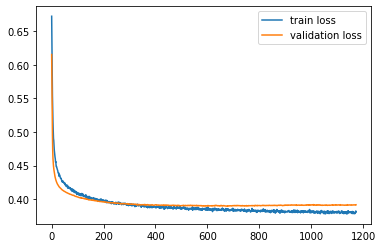

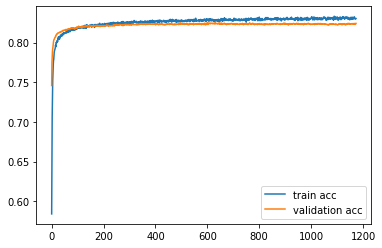

In [8]:
dnn.train_model(num_epoch=30000, batch_size=5000, patience=500)

## SHAP Interpretation

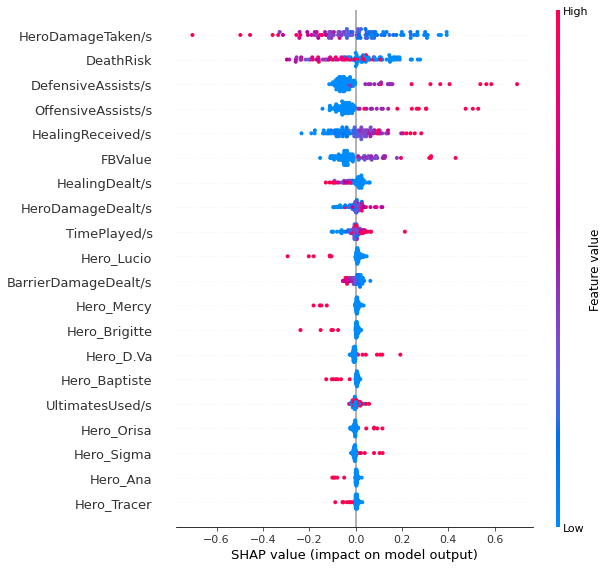

In [9]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model
explainer = shap.GradientExplainer(dnn.model, dnn.X_train[:100])
shap_values = explainer.shap_values(dnn.X_train[:100])

# plot
# shap.summary_plot(shap_values, dnn.X_test, feature_names=feature_names)
shap.summary_plot(shap_values[0], dnn.X_train[:100], feature_names=feature_names)

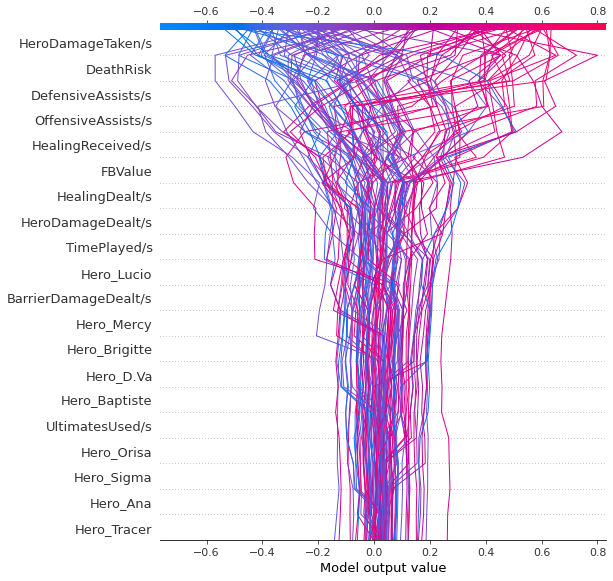

In [16]:
y_hat = dnn.model.predict(dnn.X_train)
shap.decision_plot(y_hat[0], shap_values[0], feature_names)